<a href="https://colab.research.google.com/github/acanonc/Analisis_datos/blob/main/U11_Actividad_entregable_Aprendizaje_Automatico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**U11 - Actividad entregable: Aprendizaje Automatico**

> Nombre: Angie Caroline Cañon Carrillo


> Cedula: 1000791527





##**PRIMER ANÁLISIS DE DATOS: CLASIFICACIÓN**

> Base de datos de la población de 5 a 16 años en los niveles escolares de transición, primaria, secundaria y media.



In [106]:
!pip install sodapy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sodapy import Socrata
cliente=Socrata('www.datos.gov.co', None)
result=cliente.get("ji8i-4anb")
df = pd.DataFrame.from_records(result)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ano                          366 non-null    object
 1   c_digo_departamento          366 non-null    object
 2   departamento                 366 non-null    object
 3   poblacion_5_16               366 non-null    object
 4   tasa_matriculacion_5_16      366 non-null    object
 5   cobertura_neta               366 non-null    object
 6   cobertura_neta_transicion    366 non-null    object
 7   cobertura_neta_primaria      366 non-null    object
 8   cobertura_neta_secundaria    366 non-null    object
 9   cobertura_neta_media         366 non-null    object
 10  cobertura_bruta              366 non-null    object
 11  cobertura_bruta_transicion   366 non-null    object
 12  cobertura_bruta_primaria     366 non-null    object
 13  cobertura_bruta_secundaria   366 no

,ano,c_digo_departamento,departamento,poblacion_5_16,tasa_matriculacion_5_16,cobertura_neta,cobertura_neta_transicion,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,...,reprobacion,reprobacion_transicion,reprobacion_primaria,reprobacion_secundaria,reprobacion_media,repitencia,repitencia_transicion,repitencia_primaria,repitencia_secundaria,repitencia_media
0,2011,5,Antioquia,1288473,94.01,93.85,70.28,94.12,75.68,44.37,...,2.06,0.07,1.8,2.54,2.96,4.25,0.07,4.56,5.27,1.68
1,2011,8,Atlántico,523935,99.32,99.05,50.59,98.93,80.22,50.17,...,0.54,0.12,0.45,0.67,0.75,1.82,0.12,1.77,2.18,0.88
2,2011,11,"Bogotá, D.C.",1479334,90.7,90.29,68.63,86.99,84.7,55.01,...,0,0,0,0,0,3.23,0,2.3,5.11,2.57
3,2011,13,Bolívar,496676,91.57,91.4,59.74,90.81,67.34,39.17,...,2.1,0.46,1.59,2.75,3.67,4.43,0.46,4.44,5.37,2.28
4,2011,15,Boyacá,300501,86.16,86.11,63.36,82.5,74.65,49.09,...,2.73,0.17,1.66,4.31,3.26,2.62,0.17,1.9,4.19,1.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2021,94,Guainía,15643,0.7804768906,0.7804768906,0.5577358491,0.774490566,0.3681976071,0.1083233771,...,0.1932339032,0.121039805,0.1860802958,0.2396174176,0.1506707946,0.102269421,0.121039805,0.0893965403,0.1494715652,0.0927835052
362,2021,95,Guaviare,21658,0.849062702,0.8487394958,0.4455764075,0.7802930884,0.6893503578,0.3571834185,...,0.0987884436,0.0046047583,0.0779495163,0.1493061094,0.0948687351,0.0780067975,0.0046047583,0.0571555654,0.1283891547,0.0477326969
363,2021,97,Vaupés,16081,0.5472918351,0.5472918351,0.3092307692,0.5564816193,0.3296521259,0.1281856219,...,0.0567290284,0.0016313214,0.0438429279,0.078125,0.093997735,0.0359943696,0.0016313214,0.0274337969,0.0552952202,0.0419026048
364,2021,99,Vichada,33183,0.6544013501,0.6543410783,0.4544149318,0.7293522411,0.2849379585,0.110464024,...,0.1742285981,0.0005621135,0.2107560091,0.1497829233,0.1007352941,0.11126193,0.0005621135,0.1392821201,0.0904322662,0.0337986774


**LIMPIEZA DE LOS DATOS**

In [107]:
#LIMPIEZA Y TRANSFORMACIÓN DE LOS DATOS

#Eliminar datos nulos
df = df.dropna(axis = 0, how = 'any')

#Renombrar la columna "vigenciadesde"
df = df.rename( columns = {"ano": "Año"})
df

#Tipo de datos
#df.dtypes

#Transformación del tipo de datos de un "object" a "int"
salida_1 = df['poblacion_5_16'] = df['poblacion_5_16'].astype(int)
salida_2 = df['tasa_matriculacion_5_16'] = df['tasa_matriculacion_5_16'].astype(float)
df.dtypes

#Información del dataset
df.info()

#Descripción de los datos
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 230
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Año                          230 non-null    object 
 1   c_digo_departamento          230 non-null    object 
 2   departamento                 230 non-null    object 
 3   poblacion_5_16               230 non-null    int64  
 4   tasa_matriculacion_5_16      230 non-null    float64
 5   cobertura_neta               230 non-null    object 
 6   cobertura_neta_transicion    230 non-null    object 
 7   cobertura_neta_primaria      230 non-null    object 
 8   cobertura_neta_secundaria    230 non-null    object 
 9   cobertura_neta_media         230 non-null    object 
 10  cobertura_bruta              230 non-null    object 
 11  cobertura_bruta_transicion   230 non-null    object 
 12  cobertura_bruta_primaria     230 non-null    object 
 13  cobertura_bruta_secu

,poblacion_5_16,tasa_matriculacion_5_16
count,2.300000e+02,230.000000
mean,3.078343e+05,83.752609
std,3.217915e+05,10.100667
min,1.191300e+04,54.800000
25%,9.154925e+04,77.190000
50%,2.479855e+05,85.390000
75%,3.983758e+05,90.952500
max,1.479334e+06,103.940000


In [108]:
#Construir un dataFrame para hacer la clasificación

new_df=pd.DataFrame(df['Año'])
new_df['poblacion_5_16']=df['poblacion_5_16']
new_df['tasa_matriculacion_5_16']=df['tasa_matriculacion_5_16']

new_df

,Año,poblacion_5_16,tasa_matriculacion_5_16
0,2011,1288473,94.01
1,2011,523935,99.32
2,2011,1479334,90.70
3,2011,496676,91.57
4,2011,300501,86.16
...,...,...,...
226,2017,22269,83.60
227,2017,11965,80.00
228,2017,31876,55.00
229,2017,12668,66.50


In [109]:
#Convertir los datos del data Frame de str a numericos solo la ultima columna

print(type(salida_2))
y=np.array(salida_2)
print(type(y))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [110]:
for i in y:
  print(i)

94.01
99.32
90.7
91.57
86.16
87.04
88.78
86.35
94.75
94.53
92.13
83.79
90.52
77.12
94.47
93.65
80.53
89.04
90.87
95.61
92.49
103.27
88.8
88.51
74.15
101.11
80.46
67.28
82.34
74.87
64.04
62.18
73.07
92.79
91.59
88.97
85.7
84.55
83.28
83.48
94.15
93.78
91.17
80.97
89.77
75.42
91.82
93.35
77.75
86.0
88.77
92.91
92.21
95.6
87.47
88.26
72.33
103.94
78.17
68.7
81.87
70.82
59.2
62.32
66.75
92.06
86.41
84.5
89.66
85.1
82.58
80.95
84.34
94.92
93.39
90.49
79.59
89.73
74.8
96.03
94.83
76.6
86.42
85.89
89.97
93.4
96.68
87.02
87.56
70.71
103.73
76.96
67.93
81.84
72.57
57.33
62.25
74.61
90.97
85.81
80.79
87.5
83.94
80.96
79.36
84.6
96.29
93.23
89.99
81.15
88.35
74.91
90.35
94.77
75.23
87.2
83.93
88.18
93.63
96.88
86.36
85.52
71.55
103.26
77.72
68.17
82.13
73.67
56.23
62.82
74.52
89.92
86.17
82.2
88.78
83.62
78.9
73.14
82.21
95.52
89.54
90.72
80.48
87.64
74.12
93.61
92.19
73.53
85.89
81.93
88.12
94.5
95.8
85.48
84.44
72.88
102.43
76.71
67.34
81.49
75.3
54.91
64.08
76.82
88.2
89.7
80.7
89.5
83.8
77.4


In [111]:
print('La media de la Taza de Matriculados de 5 a 16 años es: ',np.mean(y))

La media de la Taza de Matriculados de 5 a 16 años es:  83.75260869565217


In [112]:
#si el valor esta por debajo de la media es malo y la etiqueta es 0
#si el valor esta por encima de la media el bueno y la etiqueta es 1
#salida esperada es: y_
y_=[]
for i in range(len(y)):
  if y[i]<= np.mean(y):
    y_.append(0)
  else:
    y_.append(1)

print(y_)

out = np.array(y_)
print(out)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1
 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1
 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1
 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0
 1 0 1 1 

In [113]:
#Creación de arreglos de numpy

col1=pd.to_numeric(new_df['Año'], errors='coerce')
col2=pd.to_numeric(new_df['poblacion_5_16'], errors='coerce')
col3=pd.to_numeric(new_df['tasa_matriculacion_5_16'], errors='coerce')
x1=np.array(col1)
x2=np.array(col2)
x3=np.array(col3)

In [114]:
#Matriz de datos de entrada
Salida=[]
for i in range(len(col1)):
    aux=[]
    aux.append(x1[i])
    aux.append(x2[i])
    aux.append(x3[i])
    Salida.append(aux)
X=np.array(Salida)
X

array([[2.011000e+03, 1.288473e+06, 9.401000e+01],
       [2.011000e+03, 5.239350e+05, 9.932000e+01],
       [2.011000e+03, 1.479334e+06, 9.070000e+01],
       [2.011000e+03, 4.966760e+05, 9.157000e+01],
       [2.011000e+03, 3.005010e+05, 8.616000e+01],
       [2.011000e+03, 2.011850e+05, 8.704000e+01],
       [2.011000e+03, 1.241480e+05, 8.878000e+01],
       [2.011000e+03, 3.286820e+05, 8.635000e+01],
       [2.011000e+03, 2.637890e+05, 9.475000e+01],
       [2.011000e+03, 4.054310e+05, 9.453000e+01],
       [2.011000e+03, 5.709540e+05, 9.213000e+01],
       [2.011000e+03, 1.455870e+05, 8.379000e+01],
       [2.011000e+03, 2.759560e+05, 9.052000e+01],
       [2.011000e+03, 2.310460e+05, 7.712000e+01],
       [2.011000e+03, 3.337930e+05, 9.447000e+01],
       [2.011000e+03, 2.093190e+05, 9.365000e+01],
       [2.011000e+03, 4.013130e+05, 8.053000e+01],
       [2.011000e+03, 3.242190e+05, 8.904000e+01],
       [2.011000e+03, 1.140750e+05, 9.087000e+01],
       [2.011000e+03, 1.926330e

In [115]:
print(X[0])
print('---------')
print(out[0])

[2.011000e+03 1.288473e+06 9.401000e+01]
---------
1


In [116]:
#Modelo de clasificación
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,out, test_size=0.15)


In [117]:
#Datos de prueba que van para el modelo
print(X_test)
print('--------------------------')
print(y_test)

[[2.015000e+03 2.000010e+05 9.580000e+01]
 [2.017000e+03 3.279400e+05 9.360000e+01]
 [2.014000e+03 4.132270e+05 9.363000e+01]
 [2.013000e+03 9.288700e+04 7.696000e+01]
 [2.012000e+03 8.599900e+04 1.039400e+02]
 [2.013000e+03 2.445130e+05 7.480000e+01]
 [2.011000e+03 3.005010e+05 8.616000e+01]
 [2.013000e+03 3.175460e+05 8.702000e+01]
 [2.015000e+03 4.888860e+05 8.878000e+01]
 [2.017000e+03 3.187600e+04 5.500000e+01]
 [2.012000e+03 1.564800e+04 6.870000e+01]
 [2.013000e+03 5.720120e+05 9.049000e+01]
 [2.011000e+03 5.709540e+05 9.213000e+01]
 [2.012000e+03 2.736530e+05 8.977000e+01]
 [2.015000e+03 9.187400e+04 7.671000e+01]
 [2.017000e+03 3.037770e+05 8.330000e+01]
 [2.016000e+03 4.117150e+05 9.030000e+01]
 [2.016000e+03 3.063950e+05 8.470000e+01]
 [2.016000e+03 3.079890e+05 8.390000e+01]
 [2.017000e+03 1.457650e+05 7.920000e+01]
 [2.016000e+03 2.195100e+04 7.780000e+01]
 [2.017000e+03 1.914440e+05 7.580000e+01]
 [2.014000e+03 1.191600e+04 7.367000e+01]
 [2.016000e+03 1.516700e+04 6.8200

In [118]:
#Datos de entrenamiento
print(X_train)
print('--------------------------')
print(y_train)

[[2.013000e+03 1.466854e+06 8.450000e+01]
 [2.013000e+03 1.191800e+04 7.257000e+01]
 [2.012000e+03 1.192000e+04 7.082000e+01]
 [2.016000e+03 7.518500e+04 7.400000e+01]
 [2.017000e+03 1.979470e+05 9.730000e+01]
 [2.011000e+03 2.057790e+05 1.032700e+02]
 [2.014000e+03 1.269900e+04 6.282000e+01]
 [2.011000e+03 1.455870e+05 8.379000e+01]
 [2.011000e+03 1.288473e+06 9.401000e+01]
 [2.016000e+03 2.597940e+05 9.760000e+01]
 [2.011000e+03 1.585200e+04 6.728000e+01]
 [2.012000e+03 2.036260e+05 9.560000e+01]
 [2.016000e+03 1.823450e+05 8.740000e+01]
 [2.011000e+03 8.580300e+04 1.011100e+02]
 [2.012000e+03 8.946980e+05 8.826000e+01]
 [2.015000e+03 1.941080e+05 7.890000e+01]
 [2.013000e+03 8.879880e+05 8.756000e+01]
 [2.015000e+03 1.268400e+04 6.408000e+01]
 [2.016000e+03 2.195650e+05 9.240000e+01]
 [2.015000e+03 1.839000e+05 8.812000e+01]
 [2.012000e+03 4.951080e+05 8.897000e+01]
 [2.011000e+03 3.113300e+04 6.404000e+01]
 [2.014000e+03 3.313890e+05 9.035000e+01]
 [2.017000e+03 2.590510e+05 9.9100

In [119]:
#Modelo de clasificación
Knn=KNeighborsClassifier(n_neighbors=3)
Knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [120]:
#Metrica
Knn.score(X_test,y_test)

0.9142857142857143

In [123]:
#2017	22269	83.60
observacion=[[2011,22269,83.60]]
print(observacion)
ob=np.array(observacion)
print(ob)
ob.reshape(1,-1)
print(ob)

[[2011, 22269, 83.6]]
[[ 2011.  22269.     83.6]]
[[ 2011.  22269.     83.6]]


**CONCLUSIÓN**



> La clasificación no fue buena para el año 2011



In [124]:
Knn.predict(ob)

array([0])

##**SEGUNDO ANÁLISIS DE DATOS: AGRUPACIÓN**

> Base de datos de la Tasa de Cambio del Mercado del 2014 al 2022









In [125]:
result_2=cliente.get("32sa-8pi3")
data = pd.DataFrame.from_records(result_2)
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   valor          1000 non-null   object
 1   unidad         1000 non-null   object
 2   vigenciadesde  1000 non-null   object
 3   vigenciahasta  1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


,valor,unidad,vigenciadesde,vigenciahasta
0,4761.64,COP,2022-12-22T00:00:00.000,2022-12-22T00:00:00.000
1,4781.28,COP,2022-12-20T00:00:00.000,2022-12-20T00:00:00.000
2,4802.48,COP,2022-12-17T00:00:00.000,2022-12-19T00:00:00.000
3,4836.24,COP,2022-12-13T00:00:00.000,2022-12-13T00:00:00.000
4,4815.99,COP,2022-12-10T00:00:00.000,2022-12-12T00:00:00.000
...,...,...,...,...
995,1978.63,COP,2014-03-26T00:00:00.000,2014-03-26T00:00:00.000
996,1993.85,COP,2014-03-22T00:00:00.000,2014-03-25T00:00:00.000
997,1998.6,COP,2014-03-21T00:00:00.000,2014-03-21T00:00:00.000
998,2017.38,COP,2014-03-20T00:00:00.000,2014-03-20T00:00:00.000


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   valor          1000 non-null   object
 1   unidad         1000 non-null   object
 2   vigenciadesde  1000 non-null   object
 3   vigenciahasta  1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [127]:
data.describe()

,valor,unidad,vigenciadesde,vigenciahasta
count,1000,1000,1000,1000
unique,998,1,1000,1000
top,2930.17,COP,2022-12-22T00:00:00.000,2022-12-22T00:00:00.000
freq,2,1000,1,1


In [128]:
#LIMPIEZA DE DATOS

#Eliminar datos nulos
data = data.dropna(axis = 0, how = 'any')

#Renombrar la columna "vigenciadesde"
data = data.rename( columns = {"vigenciadesde": "Año"})
data = data.rename( columns = {"valor": "Pesos"})

#Reducir la fecha de los datos
data["Año"] = data.Año.str.findall(r"\d{4}").str.get(0)

#Borrar la columna "vigenciahasta" y "unidad"
del(data['vigenciahasta'])
del(data['unidad'])


#Trasformación de str a float
data['Pesos'] = data['Pesos'].astype(float)
data['Pesos'] = data['Pesos'].astype(int)
data['Año'] = data['Año'].astype(int)

data

,Pesos,Año
0,4761,2022
1,4781,2022
2,4802,2022
3,4836,2022
4,4815,2022
...,...,...
995,1978,2014
996,1993,2014
997,1998,2014
998,2017,2014


In [129]:
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=4,max_iter=300)
Kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [130]:
objetivos=Kmeans.fit_predict(data)
print(objetivos)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

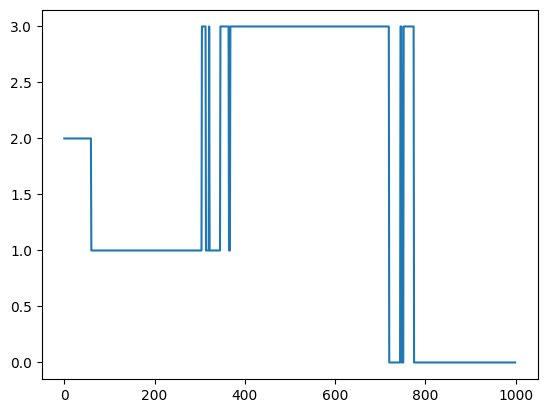

In [134]:
plt.plot(objetivos)
plt.show()

**CONCLUSIÓN**


> La agrupación fue buena, en la gráfica anterior permite identificar claramente en cuantos grupos se dividieron los datos.


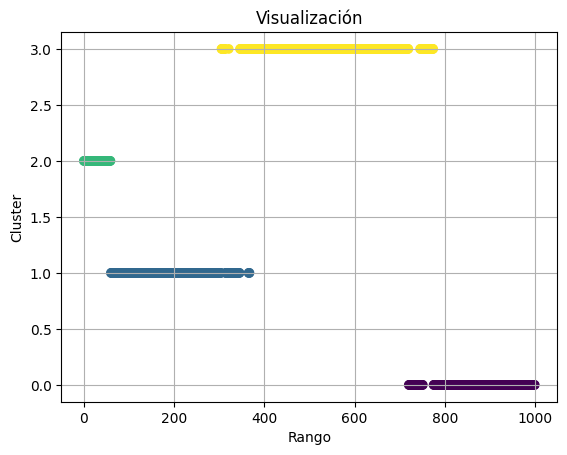

In [131]:
rango = range(0,len(objetivos))
plt.scatter(rango,objetivos,c=Kmeans.labels_)
plt.xlabel('Rango')
plt.ylabel('Cluster')
plt.title('Visualización')
plt.grid()
plt.show()